<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Business Analytics - Student Project**
    


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**
You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.
    
You have:
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics
    
You are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 1.**
    
Download the data and prepare it for analysis
Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.
    
We will download each data set, examine its types and memory usage, and will optimize the data if necesssary. We will go over each step (and at the end, do it all in one code cell, to make sure we get identical results) so we can be sure we didn't miss anything.

We will begin with the visits data, then proceed to orders and costs, respectively.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
visits['Device'] = visits['Device'].astype('category')

In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [8]:
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M")

In [9]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [10]:
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)

In [11]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The data has been optimized, and the results are identical (for the step-by-step method and the all-in-one method). We can now proceed to the other data sets.

In [12]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [13]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [14]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [15]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [16]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [17]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The other data sets have been optimized. We can now proceed to the next step.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 2. Make reports and calculate metrics:**
    
1. Product
* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* What's the user retention rate?
        
2. Sales
* When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? (LTV)
    
3. Marketing
* How much money was spent? Overall, per source and over time.
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? (ROI)

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Let's begin with the product report and metrics.
First, we will try and find the number of users for different time segments (day, week, and month). In order to do that, we will create funnels.

In [18]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [19]:
visits['date'] = visits['Start Ts'].dt.date

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Let's first see how many visits we had for each day. Following this, we will conduct a similar process to find out weekly and monthly visits.

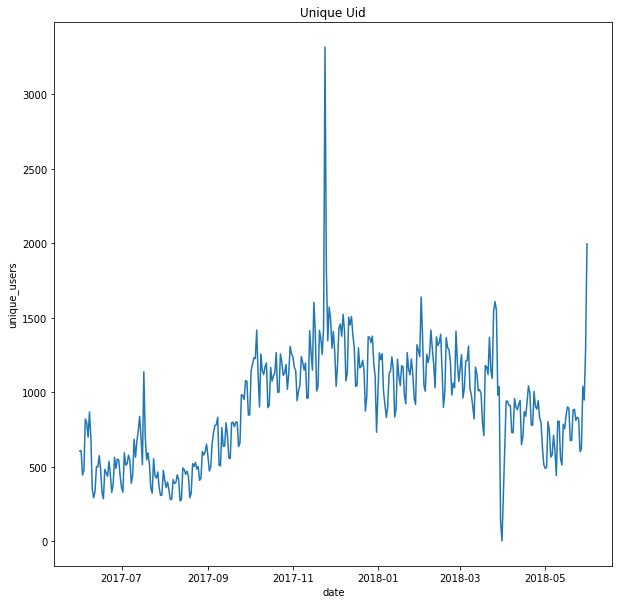

In [20]:
visits_by_day = visits.groupby('date').agg({'Uid' : 'nunique'})
visits_by_day.plot(kind='line', legend=False, title='Unique Uid', figsize=(10,10))
plt.ylabel('unique_users')
plt.show()

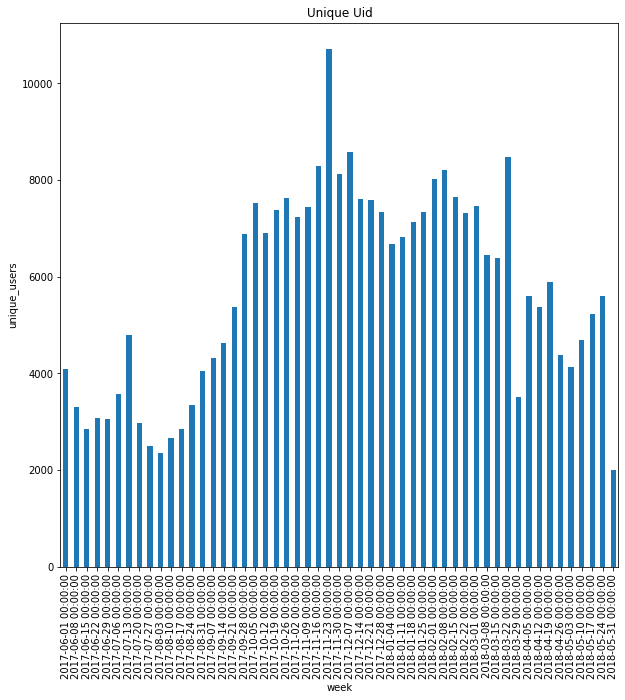

In [21]:
visits['week'] = visits['Start Ts'].astype('datetime64[W]')
visits_by_week = visits.groupby('week').agg({'Uid' : 'nunique'})
visits_by_week.plot(kind='bar', legend=False, title='Unique Uid', figsize=(10,10))
plt.ylabel('unique_users')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
After grouping visits by the week of the visit, we see that we started to see more traffic starting at 2017-09-28, reaching our highest number on 2017-11-23.
    
It appears that most of our visits occured during the middle of our sample data, and was rather low when compared to the beginning and end of our data.

In [22]:
first_activity_date = visits.groupby(['Uid'])['date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='Uid')
visits

,Device,End Ts,Source Id,Start Ts,Uid,date,week,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-27
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-02


In [23]:
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Device               359400 non-null  category      
 1   End Ts               359400 non-null  datetime64[ns]
 2   Source Id            359400 non-null  int64         
 3   Start Ts             359400 non-null  datetime64[ns]
 4   Uid                  359400 non-null  uint64        
 5   date                 359400 non-null  datetime64[ns]
 6   week                 359400 non-null  datetime64[ns]
 7   first_activity_date  359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), int64(1), uint64(1)
memory usage: 19.5 MB


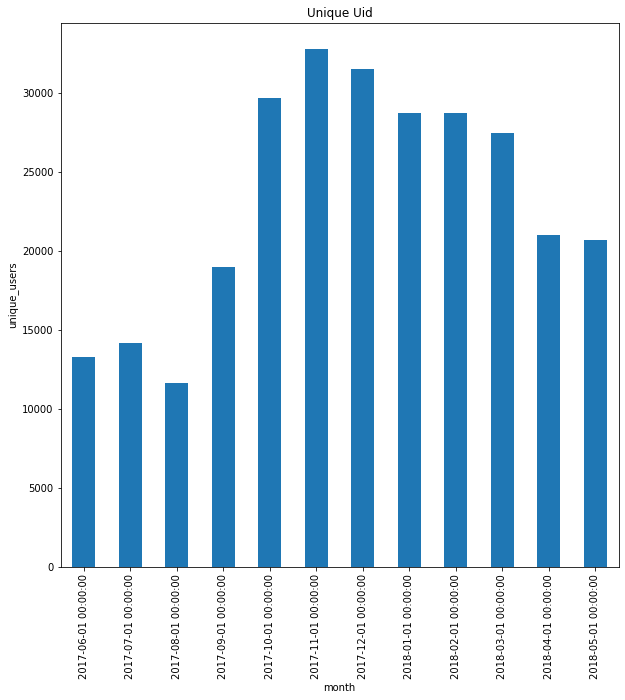

In [24]:
visits['month'] = visits['Start Ts'].astype('datetime64[M]')
visits_by_month = visits.groupby('month').agg({'Uid' : 'nunique'})
visits_by_month.plot(kind='bar', legend=False, title='Unique Uid', figsize=(10,10))
plt.ylabel('unique_users')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
After grouping visits by the month of the visit, we see that we started to see more traffic starting at 2017-10, reaching our highest number on 2017-11.
    
Our visits started to increase starting on 2017-08, and began to decline after 2017-11, with a sahrper decline after 2018-03.

In [25]:
visits

,Device,End Ts,Source Id,Start Ts,Uid,date,week,first_activity_date,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-03-09,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-27,2017-12-01
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-29,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-25,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-03,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-02,2017-11-01


In [26]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M")
visits['session_year'] = visits['Start Ts'].dt.year
visits['date'] = pd.to_datetime(visits['date'], format="%Y-%m-%d")
visits

,Device,End Ts,Source Id,Start Ts,Uid,date,week,first_activity_date,month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-20,2017-12-01,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-19,2018-02-01,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-03-09,2018-05-01,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-27,2017-12-01,2017
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-29,2017-07-01,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-25,2018-01-01,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-03,2018-03-01,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-02,2017-11-01,2017


In [27]:
visits_dau = visits.groupby('date').agg({'Uid': 'count'}).mean()
visits_dau.round()

Uid    987.0
dtype: float64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that we have, on average, 987 sessions per day.

In case we might need it for later, we will also calculate the weekly and monthly avergae sessions.

In [28]:
visits_wau = visits.groupby(['week', 'session_year']).agg({'Uid': 'nunique'}).mean()
visits_wau.round()

Uid    5622.0
dtype: float64

In [29]:
visits_mau = visits.groupby(['month', 'session_year']).agg({'Uid' : 'nunique'}).mean()
visits_mau.round()

Uid    23228.0
dtype: float64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that we have, on average, 5622 and 23228 session per week and month, respectively.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
While we are at it, let's calculate the "sticky factor".

In [30]:
visits_sticky_wau = visits_dau / visits_wau *100
visits_sticky_mau = visits_dau / visits_mau *100

print(visits_sticky_wau)
print(visits_sticky_mau)

Uid    17.563406
dtype: float64
Uid    4.250667
dtype: float64


In [31]:
sessions_per_user = visits.groupby(['session_year', 'month']).agg({'Uid': ['count', 'nunique']})
sessions_per_user

Uid        
                         count nunique
session_year month                    
2017         2017-06-01  16505   13259
             2017-07-01  17828   14183
             2017-08-01  14355   11631
             2017-09-01  23907   18975
             2017-10-01  37903   29692
             2017-11-01  43969   32797
             2017-12-01  41983   31557
2018         2018-01-01  36939   28716
             2018-02-01  37182   28749
             2018-03-01  35679   27473
             2018-04-01  26515   21008
             2018-05-01  26635   20701

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We will now turn our attention to session duration.

643.506488592098


<AxesSubplot:>

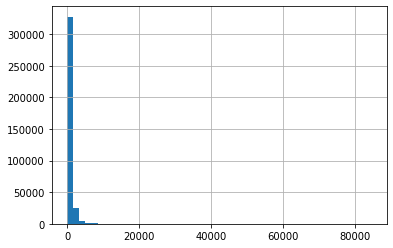

In [32]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print(visits['session_duration_sec'].mean())
visits['session_duration_sec'].hist(bins=50) 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the distribution using the mean isn't normal, so we will instead calculate the mode of the duration.

In [33]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the ASL of our visits is 60 seconds.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
To calculate the retention rate, we will assume that we want to look at the retention rate for the duration of the entire data we have, meaning the retention rate during one year.

In [34]:
visits['first_month_and_year'] = visits['first_activity_date'].dt.to_period('M').dt.to_timestamp()
visits['activity_delta'] = (pd.to_datetime(visits['month']) - pd.to_datetime(visits['first_month_and_year']))
visits

,Device,End Ts,Source Id,Start Ts,Uid,date,week,first_activity_date,month,session_year,session_duration_sec,first_month_and_year,activity_delta
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-20,2017-12-01,2017,1080,2017-12-01,0 days
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-19,2018-02-01,2018,1680,2018-02-01,0 days
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017,0,2017-07-01,0 days
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-03-09,2018-05-01,2018,1440,2018-03-01,61 days
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-27,2017-12-01,2017,0,2017-12-01,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-29,2017-07-01,2017,19,2017-07-01,0 days
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-25,2018-01-01,2018,19,2018-01-01,0 days
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-03,2018-03-01,2018,19,2018-03-01,0 days
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-02,2017-11-01,2017,19,2017-11-01,0 days


In [35]:
visits['cohort_lifetime'] = visits['activity_delta'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int) # round() added by reviewer
visits.head(15)

,Device,End Ts,Source Id,Start Ts,Uid,date,week,first_activity_date,month,session_year,session_duration_sec,first_month_and_year,activity_delta,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-20,2017-12-01,2017,1080,2017-12-01,0 days,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-19,2018-02-01,2018,1680,2018-02-01,0 days,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017,0,2017-07-01,0 days,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-03-09,2018-05-01,2018,1440,2018-03-01,61 days,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-27,2017-12-01,2017,0,2017-12-01,0 days,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-03,2017-09-01,2017,60,2017-09-01,0 days,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2017-06-29,2018-01-01,2018,3360,2017-06-01,214 days,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-05,2017-11-01,2017,60,2017-11-01,0 days,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-19,2017-07-01,2017,180,2017-07-01,0 days,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-08,2017-11-01,2017,60,2017-11-01,0 days,0


In [36]:
cohorts = visits.groupby(['first_month_and_year', 'cohort_lifetime']).agg({'Uid': 'nunique'}).reset_index()
cohorts

,first_month_and_year,cohort_lifetime,Uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [37]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month_and_year', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid': 'cohort_users'}) 
initial_users_count

,first_month_and_year,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [38]:
cohorts = cohorts.merge(initial_users_count, on='first_month_and_year')
cohorts

,first_month_and_year,cohort_lifetime,Uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [39]:
cohorts['retention'] = cohorts['Uid'] / cohorts['cohort_users'] 
cohorts

,first_month_and_year,cohort_lifetime,Uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


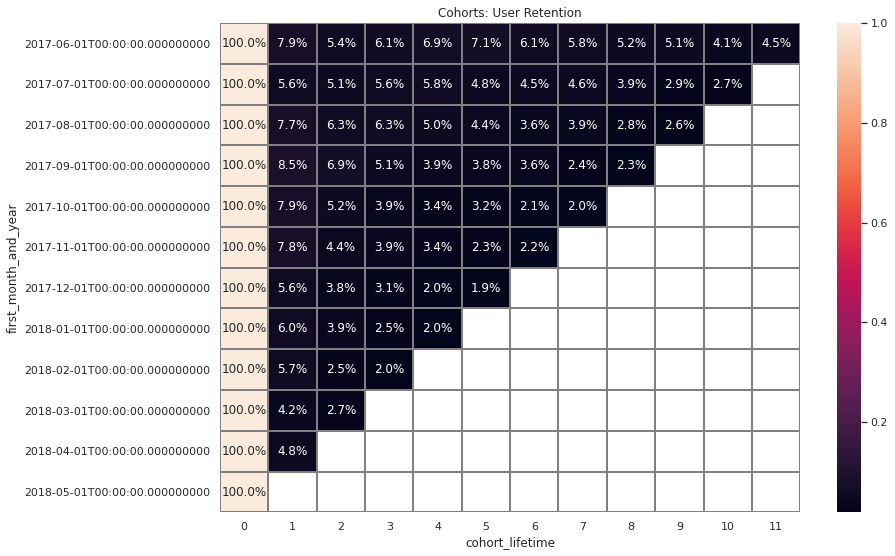

In [40]:
retention_pivot = cohorts.pivot_table(index='first_month_and_year',columns='cohort_lifetime',values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now we will proceed to the sales analysis. As a reminder, this is what we are looking to for:
* When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? (LTV)

In [41]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [42]:
orders['date'] = orders['Buy Ts'].dt.date

In [43]:
orders['date'] = pd.to_datetime(orders['date'])
orders['month_and_year'] = orders['date'].dt.to_period('M').dt.to_timestamp()
orders

,Buy Ts,Revenue,Uid,date,month_and_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [44]:
first_session_date = visits.groupby(['Uid'])['Start Ts'].min()
first_session_date.name = 'first_session_date'
visits_and_orders = orders.join(first_session_date,on='Uid')
visits_and_orders

,Buy Ts,Revenue,Uid,date,month_and_year,first_session_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2017-10-23 12:32:00


In [45]:
visits_and_orders['activity_delta'] = (pd.to_datetime(visits_and_orders['Buy Ts']) - 
                                       pd.to_datetime(visits_and_orders['first_session_date']))

In [46]:
visits_and_orders['activity_delta_days'] = visits_and_orders['activity_delta'].dt.days.astype('timedelta64[D]')
visits_and_orders

,Buy Ts,Revenue,Uid,date,month_and_year,first_session_date,activity_delta,activity_delta_days
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,0 days 00:01:00,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:11:00,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00,0 days 00:02:00,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:15:00,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00,0 days 00:27:00,0 days
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31 09:11:00,0 days 14:39:00,0 days
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31 23:05:00,0 days 00:45:00,0 days
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31 23:52:00,0 days 00:02:00,0 days
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2017-10-23 12:32:00,220 days 11:24:00,220 days


In [47]:
visits_and_orders = visits_and_orders.rename(columns={'activity_delta_days' : 'cohort_lifetime'}) 

In [48]:
visits_and_orders

,Buy Ts,Revenue,Uid,date,month_and_year,first_session_date,activity_delta,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,0 days 00:01:00,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:11:00,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00,0 days 00:02:00,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:15:00,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00,0 days 00:27:00,0 days
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31 09:11:00,0 days 14:39:00,0 days
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31 23:05:00,0 days 00:45:00,0 days
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31 23:52:00,0 days 00:02:00,0 days
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2017-10-23 12:32:00,220 days 11:24:00,220 days


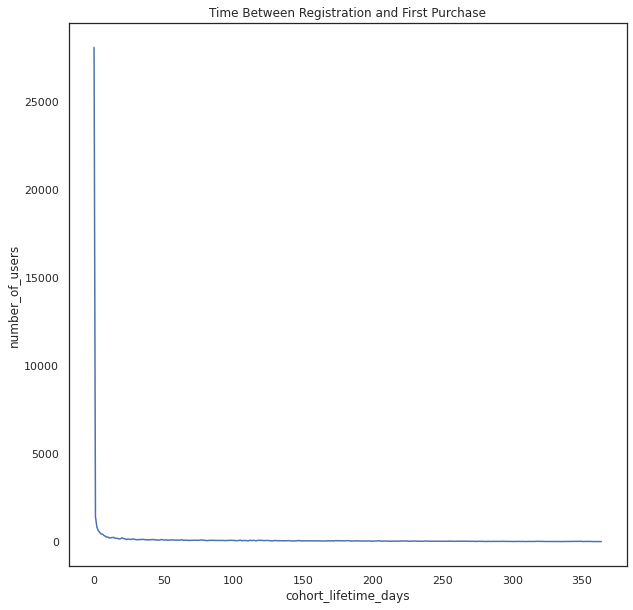

In [49]:
visits_and_orders_grouped = visits_and_orders.groupby(['cohort_lifetime']).agg({'Uid' : 'count'})
visits_and_orders_grouped = visits_and_orders_grouped.rename(columns={'Uid': 'cohort_users'})

visits_and_orders_grouped['cohort_users'].sort_values(ascending=False)
visits_and_orders_grouped = visits_and_orders_grouped.reset_index()
visits_and_orders_grouped['cohort_lifetime'] = visits_and_orders_grouped['cohort_lifetime']/np.timedelta64(1,'D')
visits_and_orders_grouped.plot(figsize=(10,10), x='cohort_lifetime', y='cohort_users', legend=False,
                                  title='Time Between Registration and First Purchase')
plt.ylabel('number_of_users')
plt.xlabel('cohort_lifetime_days')
plt.show()

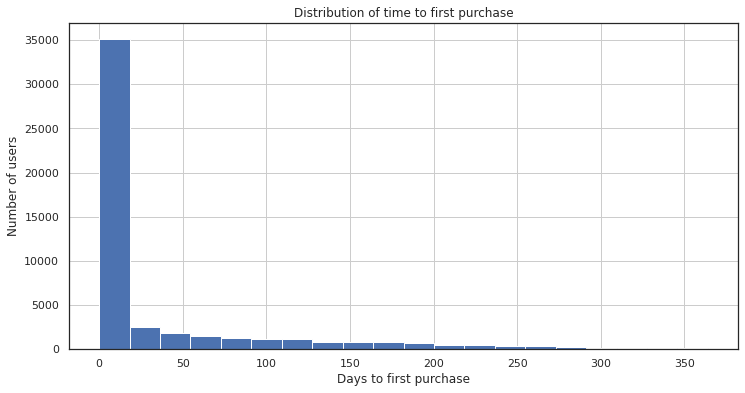

In [50]:
visits_and_orders['days_to_purchase'] = visits_and_orders['cohort_lifetime'] / np.timedelta64(1, 'D') 

plt.figure(figsize=(12,6))
           
visits_and_orders['days_to_purchase'].hist(bins=20)
plt.title('Distribution of time to first purchase') 
plt.xlabel('Days to first purchase')
plt.ylabel('Number of users')
plt.show() 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
From the numbers and the graph above, we see that a vast majority of the orders that took place happened on the same day as the first session, and decreases over time.

In [51]:
orders_period_grouped = orders.groupby('month_and_year').agg({'Uid' : 'count'})
orders_period_grouped = orders_period_grouped.rename(columns={'Uid': 'purchases'})
orders_period_grouped

,purchases
month_and_year,
2017-06-01,2354
2017-07-01,2363
2017-08-01,1807
2017-09-01,3387
2017-10-01,5679
2017-11-01,5659
2017-12-01,6218
2018-01-01,4721
2018-02-01,5281


,average_purchase_size
month_and_year,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280
2017-11-01,4.783518
2017-12-01,5.852139
2018-01-01,4.112927
2018-02-01,4.840095


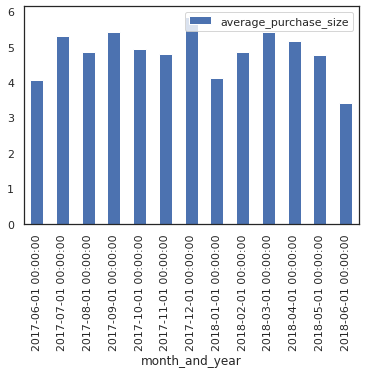

In [52]:
orders_revenue = orders.groupby(['month_and_year']).agg({'Revenue' : 'mean'})
orders_revenue = orders_revenue.rename(columns={'Revenue': 'average_purchase_size'})
orders_revenue.plot(kind='bar')
orders_revenue

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now we will calculate the LTV.

In [53]:
orders

,Buy Ts,Revenue,Uid,date,month_and_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [54]:
first_orders = orders.groupby('Uid').agg({'month_and_year': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month_and_year']
first_orders

,Uid,first_order_month_and_year
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [55]:
cohort_sizes = first_orders.groupby('first_order_month_and_year').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month_and_year', 'n_buyers']
cohort_sizes

,first_order_month_and_year,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [56]:
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_.head()

,Buy Ts,Revenue,Uid,date,month_and_year,first_order_month_and_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [57]:
cohorts = orders_.groupby(['first_order_month_and_year', 'month_and_year']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month_and_year,month_and_year,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [58]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month_and_year')
report.head()

,first_order_month_and_year,n_buyers,month_and_year,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [59]:
report['age'] = (report['month_and_year'] - report['first_order_month_and_year']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month_and_year,n_buyers,month_and_year,Revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [60]:
report['ltv'] = report['Revenue'] / report['n_buyers']

output = report.pivot_table(index='first_order_month_and_year', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_and_year,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,


In [61]:
report

,first_order_month_and_year,n_buyers,month_and_year,Revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now we will proceed to the marketing analysis. As a reminder, this is what we are looking to for:
* How much money was spent? Overall, per source and over time.
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? (ROI)

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

In [62]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [63]:
costs = costs.rename(columns = {'dt' : 'date', 'costs' : 'marketing_costs'})
costs

,source_id,date,marketing_costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [64]:
costs_overall_spent = costs['marketing_costs'].sum()
costs_overall_spent

329131.62

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that our overall markeing costs amount to 329131.62

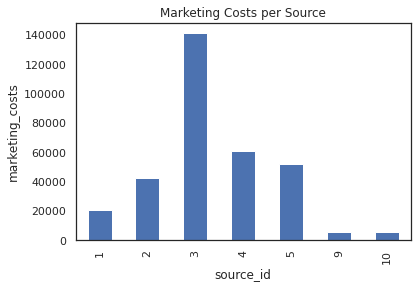

,marketing_costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [65]:
costs_per_source = costs.groupby('source_id').agg({'marketing_costs': 'sum'})
costs_per_source.plot(kind='bar', title='Marketing Costs per Source', legend=False)
plt.ylabel('marketing_costs')
plt.show()
costs_per_source

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the greatest marketing expenses are spent on source number 3, while the least amount of expenses is spent on sources 9 and 10.

In [66]:
costs['month_and_year'] = costs['date'].dt.to_period('M').dt.to_timestamp()


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that every month has an entry only in one year. In this case, we will group marketing expenses by month, without the risk of losing data.

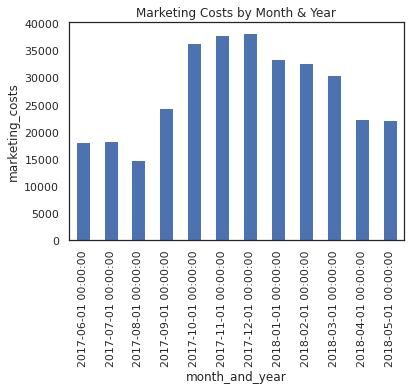

,marketing_costs
month_and_year,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [67]:
costs_per_month = costs.groupby('month_and_year').agg({'marketing_costs': 'sum'})
costs_per_month.plot(kind='bar', title='Marketing Costs by Month & Year', legend=False)
plt.ylabel('marketing_costs')
plt.show()
costs_per_month

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Since our data start at 06.2017, we see that during the summer months, marketing expenses remain low, and they increase staring 9.2017 and reach a peak at 12.2017. As the new year began, expenses began to decrease again.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We will now proceed to calculate the CAC.

In [68]:
costs_per_source

,marketing_costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [69]:
# getting the necessary cohort
#cohort_201706 = report[report['first_order_month_and_year'] == '2017-06-01']

# calculating costs for the cohort month
#costs_201706 = costs[costs['month_and_year'] == '2017-06-01']['marketing_costs'].sum()

#n_buyers_201706 = cohort_201706['n_buyers'][0]
#cac_201706 = costs_201706 / n_buyers_201706


#print('CAC =', cac_201706)


In [70]:
report_ = pd.merge(report, costs_per_month, left_on='first_order_month_and_year', right_on='month_and_year')
report_['cac'] = report_['marketing_costs'] / report_['n_buyers']
report_

,first_order_month_and_year,n_buyers,month_and_year,Revenue,age,ltv,marketing_costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00,8.905091
...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22289.38,9.793225


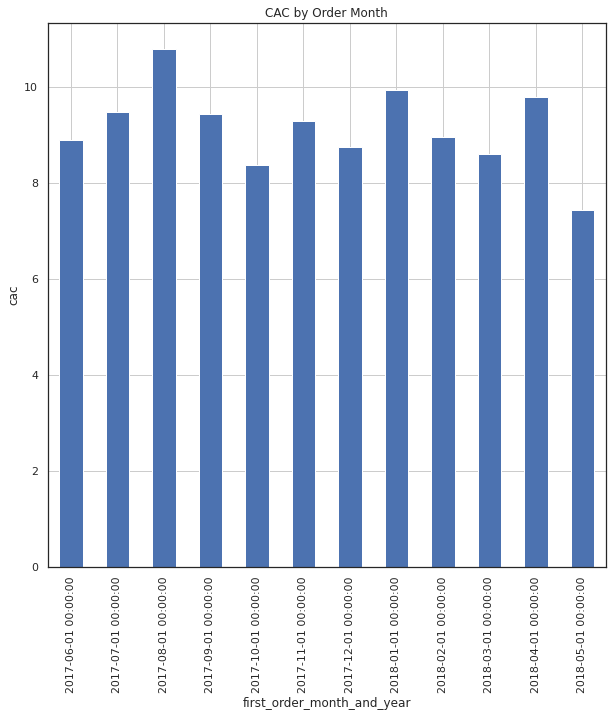

In [71]:
grouped_report_ = report_.groupby('first_order_month_and_year').head(1)
grouped_report_

grouped_report_.plot(kind='bar', x='first_order_month_and_year', y='cac', figsize=(10,10), grid=True, legend=False)
plt.title('CAC by Order Month')
plt.ylabel('cac')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
From the CAC graph, we see that expenses peaked during the the down months (we needed to spend more on marketing to attract users, and mostly decreased during busier months.

In [72]:
costs_per_source['average_cac'] = costs_per_source['marketing_costs'] / 12
costs_per_source

,marketing_costs,average_cac
source_id,,
1,20833.27,1736.105833
2,42806.04,3567.170000
3,141321.63,11776.802500
4,61073.60,5089.466667
5,51757.10,4313.091667
9,5517.49,459.790833
10,5822.49,485.207500


In [73]:
# Getting the number of buyers per source

user_source = visits.sort_values(by=['Start Ts']).groupby(['Uid']).agg({'Source Id': 'first'}).reset_index()

buyers_per_source = user_source[user_source['Uid'].isin(orders.Uid.unique())].groupby('Source Id')['Uid'].nunique().reset_index()

buyers_per_source.columns = ['source_id', 'buyer_cnt']

buyers_per_source

,source_id,buyer_cnt
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [74]:
# Calculating the average CAC

costs_per_source1 = costs_per_source.reset_index().copy()

costs_per_source1 = costs_per_source1.merge(buyers_per_source, on = 'source_id' )

costs_per_source1['average_cac'] = costs_per_source1['marketing_costs'] / costs_per_source1['buyer_cnt']
costs_per_source1

,source_id,marketing_costs,average_cac,buyer_cnt
0,1,20833.27,7.186364,2899
1,2,42806.04,12.209367,3506
2,3,141321.63,13.493901,10473
3,4,61073.60,5.931779,10296
4,5,51757.10,7.467479,6931
5,9,5517.49,5.071222,1088
6,10,5822.49,4.381106,1329


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment v.5</b>
    
We will calculate the over average CAC below

In [75]:
overall_average_cac = costs_per_source1['marketing_costs'].sum() / costs_per_source1['buyer_cnt'].sum()
print("overall average cac is:", overall_average_cac)

overall average cac is: 9.0118728437654


In [76]:
# Calculating the revenue per source

buyers_source1 = orders.merge(user_source, on='Uid')

buyers_source1 = buyers_source1.groupby('Source Id').agg({'Revenue': 'sum'}).reset_index()

buyers_source1.columns = ['source_id', 'revenue']

romi_report = costs_per_source1.merge(buyers_source1, on = 'source_id')

# Calculating LTV per source

romi_report['avg_ltv_per_buyer'] =  romi_report['revenue'] / romi_report['buyer_cnt']

# Calculating ROMI per source

romi_report['romi'] = romi_report['avg_ltv_per_buyer'] / romi_report['average_cac']


romi_report

,source_id,marketing_costs,average_cac,buyer_cnt,revenue,avg_ltv_per_buyer,romi
0,1,20833.27,7.186364,2899,31090.55,10.724577,1.492351
1,2,42806.04,12.209367,3506,46923.61,13.383802,1.096191
2,3,141321.63,13.493901,10473,54511.24,5.204931,0.385725
3,4,61073.60,5.931779,10296,56696.83,5.506685,0.928336
4,5,51757.10,7.467479,6931,52624.02,7.592558,1.016750
5,9,5517.49,5.071222,1088,5759.40,5.293566,1.043844
6,10,5822.49,4.381106,1329,4450.33,3.348631,0.764335


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment v.5</b>
    
So here are my conclusions: all the sources with romi > 1, i.e. 1,2,4,5 returned the mmoney invested.

In [77]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(index='first_order_month_and_year', columns='age', values='romi', aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_and_year,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
After calculating the ROMI, we see that only the first (2017-06) and fourth (2017-09) cohorts paid off. The first cohort started to pay off on the 7th month (where ROMI=1.05), while the fourth cohort started to pay off on the 4th month (where ROMI=1.19). 

In [78]:
visits = visits.rename(columns = {'Source Id' : 'source_id'})
visits_by_source = visits.pivot_table(index='source_id', columns='first_month_and_year', values='Uid', aggfunc='nunique')
visits_by_source['total_users'] = visits_by_source.sum(axis=1)
visits_by_source

first_month_and_year,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,total_users
source_id,,,,,,,,,,,,,
1,1513.0,1282.0,910.0,1526.0,2239.0,2484.0,2120.0,1647.0,1553.0,1515.0,1112.0,1098.0,18999.0
2,2202.0,1974.0,1263.0,2114.0,3105.0,3426.0,2623.0,2171.0,2086.0,2059.0,1472.0,1750.0,26245.0
3,5199.0,4582.0,3593.0,5981.0,8551.0,9572.0,8244.0,7385.0,7292.0,6136.0,4249.0,3972.0,74756.0
4,4602.0,4644.0,3440.0,5721.0,9414.0,10272.0,10099.0,8599.0,7883.0,7730.0,5647.0,5474.0,83525.0
5,3566.0,4005.0,3249.0,5093.0,7587.0,6351.0,5632.0,5226.0,5084.0,3926.0,4086.0,3169.0,56974.0
6,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0
7,2.0,2.0,2.0,2.0,6.0,1.0,9.0,4.0,2.0,1.0,1.0,2.0,34.0
9,1057.0,713.0,602.0,820.0,1039.0,1227.0,926.0,690.0,609.0,917.0,331.0,333.0,9264.0
10,543.0,394.0,285.0,562.0,970.0,837.0,581.0,839.0,933.0,1003.0,492.0,628.0,8067.0


In [79]:
visits_by_source

first_month_and_year,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,total_users
source_id,,,,,,,,,,,,,
1,1513.0,1282.0,910.0,1526.0,2239.0,2484.0,2120.0,1647.0,1553.0,1515.0,1112.0,1098.0,18999.0
2,2202.0,1974.0,1263.0,2114.0,3105.0,3426.0,2623.0,2171.0,2086.0,2059.0,1472.0,1750.0,26245.0
3,5199.0,4582.0,3593.0,5981.0,8551.0,9572.0,8244.0,7385.0,7292.0,6136.0,4249.0,3972.0,74756.0
4,4602.0,4644.0,3440.0,5721.0,9414.0,10272.0,10099.0,8599.0,7883.0,7730.0,5647.0,5474.0,83525.0
5,3566.0,4005.0,3249.0,5093.0,7587.0,6351.0,5632.0,5226.0,5084.0,3926.0,4086.0,3169.0,56974.0
6,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0
7,2.0,2.0,2.0,2.0,6.0,1.0,9.0,4.0,2.0,1.0,1.0,2.0,34.0
9,1057.0,713.0,602.0,820.0,1039.0,1227.0,926.0,690.0,609.0,917.0,331.0,333.0,9264.0
10,543.0,394.0,285.0,562.0,970.0,837.0,581.0,839.0,933.0,1003.0,492.0,628.0,8067.0


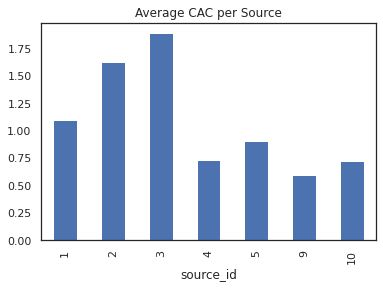

,marketing_costs,average_cac,total_users,average_cac_per_source
source_id,,,,
1,20833.27,1736.105833,18999.0,1.096546
2,42806.04,3567.170000,26245.0,1.631017
3,141321.63,11776.802500,74756.0,1.890439
4,61073.60,5089.466667,83525.0,0.731201
5,51757.10,4313.091667,56974.0,0.908434
9,5517.49,459.790833,9264.0,0.595584
10,5822.49,485.207500,8067.0,0.721766


In [80]:
costs_per_source_joined = costs_per_source.join(visits_by_source[['total_users']], on =None)
costs_per_source_joined['average_cac_per_source'] = costs_per_source_joined['marketing_costs']/costs_per_source_joined['total_users']
costs_per_source_joined['average_cac_per_source'].plot(kind='bar', title='Average CAC per Source')
plt.show()
costs_per_source_joined

In [81]:
visits

,Device,End Ts,source_id,Start Ts,Uid,date,week,first_activity_date,month,session_year,session_duration_sec,first_month_and_year,activity_delta,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-20,2017-12-01,2017,1080,2017-12-01,0 days,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-19,2018-02-01,2018,1680,2018-02-01,0 days,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017,0,2017-07-01,0 days,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-03-09,2018-05-01,2018,1440,2018-03-01,61 days,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-27,2017-12-01,2017,0,2017-12-01,0 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-29,2017-07-01,2017,19,2017-07-01,0 days,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-25,2018-01-01,2018,19,2018-01-01,0 days,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-03,2018-03-01,2018,19,2018-03-01,0 days,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-02,2017-11-01,2017,19,2017-11-01,0 days,0


In [82]:
visits_and_orders_joined = visits_and_orders.join(visits[['source_id']], on =None)
visits_and_orders_joined

,Buy Ts,Revenue,Uid,date,month_and_year,first_session_date,activity_delta,cohort_lifetime,days_to_purchase,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,0 days 00:01:00,0 days,0.0,4
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:11:00,0 days,0.0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00,0 days 00:02:00,0 days,0.0,5
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:15:00,0 days,0.0,9
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00,0 days 00:27:00,0 days,0.0,3
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31 09:11:00,0 days 14:39:00,0 days,0.0,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31 23:05:00,0 days 00:45:00,0 days,0.0,3
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31 23:52:00,0 days 00:02:00,0 days,0.0,2
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2017-10-23 12:32:00,220 days 11:24:00,220 days,220.0,2


In [83]:
visits = visits.sort_values(by='first_activity_date')
first_user_visit = visits.drop_duplicates(subset='Uid')
first_user_visit
#now lets find the first order
visits_and_orders_joined = visits_and_orders_joined.sort_values(by='Buy Ts')
first_user_order = visits_and_orders_joined.drop_duplicates(subset='Uid')
first_user_order

,Buy Ts,Revenue,Uid,date,month_and_year,first_session_date,activity_delta,cohort_lifetime,days_to_purchase,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,0 days 00:01:00,0 days,0.0,4
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:11:00,0 days,0.0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00,0 days 00:02:00,0 days,0.0,5
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:15:00,0 days,0.0,9
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00,0 days 00:27:00,0 days,0.0,3
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31 09:11:00,0 days 14:39:00,0 days,0.0,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31 23:05:00,0 days 00:45:00,0 days,0.0,3
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31 23:52:00,0 days 00:02:00,0 days,0.0,2
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2017-10-23 12:32:00,220 days 11:24:00,220 days,220.0,2


In [84]:
first_user_visit.head(5)
first_user_order.head(5)

,Buy Ts,Revenue,Uid,date,month_and_year,first_session_date,activity_delta,cohort_lifetime,days_to_purchase,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,0 days 00:01:00,0 days,0.0,4
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:11:00,0 days,0.0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:25:00,0 days 00:02:00,0 days,0.0,5
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:15:00,0 days,0.0,9
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:31:00,0 days 00:27:00,0 days,0.0,3


In [85]:
unique_uids = orders['Uid'].unique()
temp = pd.DataFrame({'Uid' : unique_uids})
merged_df = pd.merge(temp, first_user_order, on='Uid', how='left')
orders_with_source = pd.merge(orders, merged_df, on='Uid')
orders_with_source

#made the change here as per reviewer's comment that cac should be calculated by first order, and not by first visit


,Buy Ts_x,Revenue_x,Uid,date_x,month_and_year_x,Buy Ts_y,Revenue_y,date_y,month_and_year_y,first_session_date,activity_delta,cohort_lifetime,days_to_purchase,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,17.00,2017-06-01,2017-06-01,2017-06-01 00:09:00,0 days 00:01:00,0 days,0.0,4
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,0.55,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:11:00,0 days,0.0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,0.37,2017-06-01,2017-06-01,2017-06-01 00:25:00,0 days 00:02:00,0 days,0.0,5
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,0.55,2017-06-01,2017-06-01,2017-06-01 00:14:00,0 days 00:15:00,0 days,0.0,9
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,0.37,2017-06-01,2017-06-01,2017-06-01 07:31:00,0 days 00:27:00,0 days,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31 23:50:00,4.64,2018-05-31,2018-05-01,2018-05-31 09:11:00,0 days 14:39:00,0 days,0.0,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31 23:50:00,5.80,2018-05-31,2018-05-01,2018-05-31 23:05:00,0 days 00:45:00,0 days,0.0,3
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31 23:54:00,0.30,2018-05-31,2018-05-01,2018-05-31 23:52:00,0 days 00:02:00,0 days,0.0,2
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018-05-31 23:56:00,3.67,2018-05-31,2018-05-01,2017-10-23 12:32:00,220 days 11:24:00,220 days,220.0,2


In [86]:
first_orders_by_source = orders_with_source.pivot_table(index='source_id', columns='month_and_year_x', values='Uid', aggfunc='nunique')
first_orders_by_source['total_users'] = first_orders_by_source.sum(axis=1)
first_orders_by_source

month_and_year_x,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,total_users
source_id,,,,,,,,,,,,,,
1,192.0,214.0,168.0,255.0,481.0,473.0,467.0,350.0,415.0,406.0,266.0,359.0,NaN,4046.0
2,266.0,275.0,214.0,371.0,588.0,625.0,654.0,518.0,580.0,553.0,330.0,459.0,NaN,5433.0
3,476.0,467.0,357.0,668.0,1108.0,1101.0,1176.0,927.0,987.0,946.0,664.0,878.0,1.0,9756.0
4,575.0,541.0,398.0,786.0,1308.0,1239.0,1413.0,1119.0,1238.0,1213.0,763.0,979.0,NaN,11572.0
5,380.0,355.0,246.0,493.0,852.0,833.0,888.0,714.0,784.0,774.0,533.0,654.0,NaN,7506.0
6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,7.0
9,66.0,74.0,54.0,107.0,191.0,164.0,198.0,162.0,151.0,162.0,105.0,110.0,NaN,1544.0
10,68.0,58.0,35.0,70.0,146.0,111.0,146.0,108.0,102.0,124.0,81.0,105.0,NaN,1154.0


In [87]:
def get_column_index(thetimestamp):
    display(thetimestamp)
    for i in first_orders_by_source.columns:
        display(i)
        if pd.to_datetime(thetimestamp) == i:
            return i

In [88]:
g = get_column_index('2017-06-01')
g
first_orders_by_source.loc[1,pd.to_datetime('2017-06-01')]


'2017-06-01'

Timestamp('2017-06-01 00:00:00')

192.0

In [89]:
#now we need to calculate the marketing costs for each source per month so that we can finally calculate the monthly cac per source
costs_grouped_by_source_and_month = costs.groupby(['source_id', 'month_and_year'])['marketing_costs'].sum()
costs_grouped_by_source_and_month
costs_group_and_month_df = costs_grouped_by_source_and_month.to_frame()
costs_group_and_month_df

marketing_costs
source_id month_and_year                 
1         2017-06-01              1125.61
          2017-07-01              1072.88
          2017-08-01               951.81
          2017-09-01              1502.01
          2017-10-01              2315.75
...                                   ...
10        2018-01-01               614.35
          2018-02-01               480.88
          2018-03-01               526.41
          2018-04-01               388.25
          2018-05-01               409.86

[84 rows x 1 columns]

In [90]:
# and now for monthly cac by source
cac_column = []
for index,row in costs_group_and_month_df.iterrows():
    source = index[0]
    timestamp = index[1]
    cac_column.append(first_orders_by_source.loc[source, timestamp])
    #display(first_orders_by_source.loc[source, timestamp])
    #first_orders_by_source.loc[index,pd.to_datetime(row['month_and_year'])
costs_group_and_month_df['total_users'] = cac_column
costs_group_and_month_df['average_monthly_cac'] = costs_group_and_month_df['marketing_costs'] / costs_group_and_month_df['total_users']
costs_group_and_month_df

marketing_costs  total_users  average_monthly_cac
source_id month_and_year                                                   
1         2017-06-01              1125.61        192.0             5.862552
          2017-07-01              1072.88        214.0             5.013458
          2017-08-01               951.81        168.0             5.665536
          2017-09-01              1502.01        255.0             5.890235
          2017-10-01              2315.75        481.0             4.814449
...                                   ...          ...                  ...
10        2018-01-01               614.35        108.0             5.688426
          2018-02-01               480.88        102.0             4.714510
          2018-03-01               526.41        124.0             4.245242
          2018-04-01               388.25         81.0             4.793210
          2018-05-01               409.86        105.0             3.903429

[84 rows x 3 columns]

In [91]:
source1_orders = orders_with_source.loc[orders_with_source['source_id'] == 1]
source1_orders

,Buy Ts_x,Revenue_x,Uid,date_x,month_and_year_x,Buy Ts_y,Revenue_y,date_y,month_and_year_y,first_session_date,activity_delta,cohort_lifetime,days_to_purchase,source_id
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,2017-06-01 08:54:00,1.83,2017-06-01,2017-06-01,2017-06-01 08:51:00,0 days 00:03:00,0 days,0.0,1
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-05,2017-06-01,2017-06-01 08:54:00,1.83,2017-06-01,2017-06-01,2017-06-01 08:51:00,0 days 00:03:00,0 days,0.0,1
251,2017-06-01 10:27:00,1.22,4409266971612110231,2017-06-01,2017-06-01,2017-06-01 10:27:00,1.22,2017-06-01,2017-06-01,2017-06-01 09:55:00,0 days 00:32:00,0 days,0.0,1
365,2017-06-01 20:16:00,3.05,8655045207590755923,2017-06-01,2017-06-01,2017-06-01 20:16:00,3.05,2017-06-01,2017-06-01,2017-06-01 20:15:00,0 days 00:01:00,0 days,0.0,1
366,2017-06-01 21:14:00,3.05,8655045207590755923,2017-06-01,2017-06-01,2017-06-01 20:16:00,3.05,2017-06-01,2017-06-01,2017-06-01 20:15:00,0 days 00:01:00,0 days,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50340,2018-05-31 19:41:00,30.80,12650795391896494494,2018-05-31,2018-05-01,2018-05-31 19:15:00,33.24,2018-05-31,2018-05-01,2017-08-26 03:56:00,278 days 15:19:00,278 days,278.0,1
50349,2018-05-31 19:46:00,2.75,3960005711767777704,2018-05-31,2018-05-01,2018-05-31 19:46:00,2.75,2018-05-31,2018-05-01,2018-05-31 19:39:00,0 days 00:07:00,0 days,0.0,1
50379,2018-05-31 21:48:00,5.50,10394363694271133241,2018-05-31,2018-05-01,2018-05-31 21:48:00,5.50,2018-05-31,2018-05-01,2018-05-30 23:11:00,0 days 22:37:00,0 days,0.0,1
50383,2018-05-31 22:00:00,0.61,2036080278061382223,2018-05-31,2018-05-01,2018-05-31 22:00:00,0.61,2018-05-31,2018-05-01,2018-05-31 21:38:00,0 days 00:22:00,0 days,0.0,1


In [92]:
orders_with_source = orders_with_source.rename(columns={'Revenue_x': 'Revenue', 'month_and_year_x' : 'month_and_year)

SyntaxError: EOL while scanning string literal (3967809234.py, line 1)

In [ ]:
aggdict = {'Uid': 'nunique', 'Revenue' : 'sum'}
orders_with_source_pivot = orders_with_source.pivot_table(index=['source_id', 'month_and_year', 'first_session_date'], 
                            values=['Uid', 'Revenue'], aggfunc=aggdict)
orders_with_source_pivot

In [ ]:

orders_with_source_pivot = orders_with_source_pivot.rename(columns = {'Uid' : 'number_of_users'})
orders_with_source_pivot['ltv'] = orders_with_source_pivot['Revenue'] / orders_with_source_pivot['number_of_users']
orders_with_source_pivot = orders_with_source_pivot.reset_index()
orders_with_source_pivot['age'] = (orders_with_source_pivot['month_and_year'] - 
                                   orders_with_source_pivot['first_month_and_year']) / np.timedelta64(1, 'M')
orders_with_source_pivot['age'] = orders_with_source_pivot['age'].round().astype('int')

orders_with_source_pivot.set_index(['source_id'], inplace=True)


In [ ]:
def show_source_ltv(index) :
    try:
        source = orders_with_source_pivot.loc[index, :]
    except KeyError: # no entries for this source
        return
    if isinstance(source, pd.Series):
        # the "dataframe" for this source has only one row so moving on..
        return

    output = source.pivot_table(index='first_month_and_year', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1)

    output.fillna('')
    
    print("LTV for source_id", index)
    print("\n")
    
    display(output)
    print("\n")
    return(output)
    

In [ ]:
orders_with_source_pivot.Revenue.sum()

In [ ]:
ltv_source_dict = {}
for index in orders_with_source_pivot.index.unique():
    try:
        source = orders_with_source_pivot.loc[index, :]
    except KeyError: # no entries for this source
        continue
    if isinstance(source, pd.Series):
        # the "dataframe" for this source has only one row so moving on..
        continue
    output = source.pivot_table(index='first_month_and_year', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1)

    output.fillna('')
    
    #print("LTV for source_id", index)
    #print("\n")
    
    #display(output)
    #rint("\n")
    #print(index)
    ltv_source_dict[index] = output
display(ltv_source_dict)
    
    
    

In [ ]:
# now let's sum the ltv for each source for each cohort
ltv_cohorts_source_and_month = {}
for key in ltv_source_dict:
    ltv_cohorts_source_and_month[key] = {}
    source_df = ltv_source_dict[key]
    for index in source_df.index:
        ltv_cohorts_source_and_month[key][index.strftime('%Y-%m-%d')] = source_df.loc[index].sum()
ltv_cohorts_source_and_month

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
OK. Making progress. I have the calculations of all the cohorts for all the ltv's per source...
I am submitting:
    a. to make sure I am on the right path
    b. now I understand that I need to do the same for the cac, but I am really running out of time, and need to start my next project. So I would like to take a raincheck on completing this once approved that this is the right direction.
    
Thank you

In [ ]:
visits_and_orders_by_source = visits_and_orders_joined.pivot_table(index='source_id', 
                            columns='month_and_year', values='Revenue', aggfunc='sum')
#visits_by_source['total_users'] = visits_by_source.sum(axis=1)
visits_and_orders_by_source

In [ ]:
#orders_by_source = visits_and_orders.pivot_table(index='source_id', columns='first_month_and_year', values='Uid', aggfunc='nunique')
#visits_by_source['total_users'] = visits_by_source.sum(axis=1)
#visits_by_source

In [ ]:
#report_['romi'] = report_['ltv'] / report_['cac']
#report['ltv'] = report['Revenue'] / report['n_buyers']
#costs_per_source_per_month = costs.groupby(pd.Grouper(key='date', freq='M')).sum()
#costs_per_source_per_month
costs_source_grouped = costs.groupby(['source_id', 'month_and_year'])['marketing_costs'].sum()
costs_source_grouped

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 3.**
    
Write a conclusion: advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>

**Conclusions:**
1. I would advise the marketing experts to invest more in the sources 4 and 5, and even to increase expenses for source 3. Assuming that these are the sources that generate the most revenue, it would make sense to increase their spending. Other sources, such as 9 and 10, might not generate enough revenue to justify and meaningful extra expenses.
2. By the average CAC per source, the most financially sound sources are 9 and 4, while sources 1 and 5 nearly are nearly equal to 1.
3. From the ROMI table, we can see that marketing expenses during the busier times of the year (2017-09 up to 2018-03) have paid off. We can assume that since these are the holidays, people are going to buy regardless of whether their is an increase in marketing.
4. Another observation from the ROMI table: ROMI keeps increasing every month for every cohort. Even if some haven't yet paid off, it is trending in a positive trajectory. So the investors should be able to get a good return for thier efforts.
5. Traffic (both visits and orders) tends to increase after summer (2017-09) and begin to decrease after December, with sharper decreases starting at 2018-03.
6. User mostly finish their engagement (order) on the same day as their first visit. We need to figure out how to get them to return more frequently.